In [24]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import expm
import math

In [34]:
def sym(p0, tmax, delta):

    #inicializa e preenche as matrizes e vetores

    em = np.exp(-1*delta/2.0)
    ep = np.exp(delta/2.0)
    K = [[0,em,1], #matriz de K das trocas
        [ep,0,1],
        [1,1,0]]
    t = 0 #tempo variavel
    t_vec = [t] #tempo vetor
    s = 0 #entropia variavel
    s_vec = [s] #entropia vetor
    index = [0,1,2] #auxiliar de index

    #define o estado inicial (a mudar)
    
    #"""  for i in range(len(p0)):
    #   if p0[i]!=0:
    #        state = p0[i]
    
    p_tau = p0
    
    state = np.random.choice([0,1,2], p=p0)

    #define a matrix W para a evolucao temporal
    W = np.zeros((3,3))
    for i in range(3):
        for j in range(3):
            aux = 0
            if i==j:
                for ks in range(3):
                    aux += K[ks][i]
            W[i][j] = K[i][j] - aux

    #inicia a simulacao ate o t maximo
    while t<tmax:
        #define direita e esquerda
        minus = (state-1) if (state-1) > -1 else 2
        plus = (state+1)%3
        # saca os dois numeros aleatorios
        r1 = np.random.rand()
        r2 = np.random.rand()
        # calcula os p's
        p_minus = K[minus][state]
        p_plus  = K[plus][state]
        p_0 = p_minus+p_plus
        #calcula o tempo ate o pulo e qual pulo deu:
        tau = (1/p_0)*math.log(1/r1)

        #define o pulo, de x_l para x 
        x_l = state
        if r2 < p_minus/p_0:
            x = minus
        else:
            x = plus

        #atualiza os vetores:
        t += tau
        t_vec.append(t)
        p_tau = np.dot(expm(tau*W), p_tau)

        #calcula a entropia relativa ao pulo

        s_pulo = 293 * 8.61733e-5 * math.log((K[x][x_l] * p_tau[x_l]) / (K[x_l][x] * p_tau[x]))
        s += s_pulo
        s_vec.append(s)
        
    return t_vec, s_vec

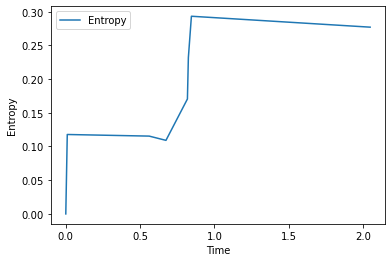

In [156]:
p0 = [0,0,1]
tmax = 2
delta =5

t_, s_ = sym(p0, tmax, delta)
plt.plot(t_, s_, label='Entropy')
plt.xlabel('Time')
plt.ylabel('Entropy')
plt.legend()
plt.show()